In [1]:
"""Optimizing threshold for private multiplicative weights
Author: Albert Sun 7/13/2021"""
from src.hdmm import workload, fairtemplates, error, fairmechanism, matrix, mechanism, templates
from implementations import pmw, pmw_optimized
import numpy as np

## Intialize Workloads


In [2]:
W_identity = workload.Identity(8).dense_matrix()
W_allrange = workload.AllRange(8).dense_matrix()
W_total = workload.Total(8).dense_matrix()

W_five_identity = np.vstack((W_identity, W_identity, W_identity, W_identity, W_identity))
W_sd = np.vstack((W_identity, W_allrange))
W_ds = np.vstack((W_allrange, W_identity))
W_sds = np.vstack((W_identity, W_allrange, W_identity))
W_dsd = np.vstack((W_allrange, W_identity, W_allrange))
W_random = np.random.permutation(W_sd)

## Initialize Databases


In [3]:
x_flat = np.array([1000, 1210, 1300, 1250, 1500, 1450, 1700, 1720])
x_peaks = np.array([1000, 8000, 1300, 1250, 9000, 1450, 1700, 1720])

## Implementations

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 3150.555288721226
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 889.5686130854333
1 [0. 1. 0. 0. 0. 0. 0. 0.] 1210.2903222881203
2 [0. 0. 1. 0. 0. 0. 0. 0.] 933.2081670685996
3 [0. 0. 0. 1. 0. 0. 0. 0.] 1070.9999266865439
4 [0. 0. 0. 0. 1. 0. 0. 0.] 1445.3543358493107
5 [0. 0. 0. 0. 0. 1. 0. 0.] 1508.59466575034
6 [0. 0. 0. 0. 0. 0. 1. 0.] 1536.3670704132685
7 [0. 0. 0. 0. 0. 0. 0. 1.] 1836.8899627585245
8 [1. 0. 0. 0. 0. 0. 0. 0.] 1066.8730476667172
9 [0. 1. 0. 0. 0. 0. 0. 0.] 510.5778100191395
10 [0. 0. 1. 0. 0. 0. 0. 0.] 1426.0397764700433
11 [0. 0. 0. 1. 0. 0. 0. 0.] 1200.1107050623448
12 [0. 0. 0. 0. 1. 0. 0. 0.] 1325.5469136457484
13 [0. 0. 0. 0. 0. 1. 0. 0.] 1684.1131423561462
14 [0. 0. 0. 0. 0. 0. 1. 0.] 1934.5553127911678
15 [0. 0. 0. 0. 0. 0. 0. 1.] 1724.5425492697664
16 [1. 0. 0. 0. 0. 0. 0. 0.] 1155.0417907553897
17 [0. 1. 0. 0. 0. 0. 0. 0.] 1232.9890844910108
18 [0. 0. 1. 0. 0. 0. 0. 0.]

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125]

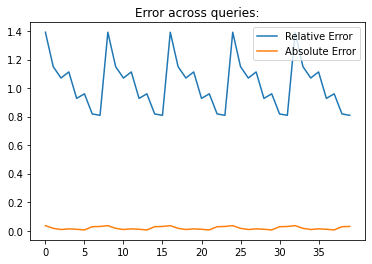

In [4]:
pmw(W_five_identity, x_flat)

original database: [1000 8000 1300 1250 9000 1450 1700 1720]
T (Threshold) = 2249.1248382364483
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 1058.0262548826424
1 [0. 1. 0. 0. 0. 0. 0. 0.] 8005.961356776772
2 [0. 0. 1. 0. 0. 0. 0. 0.] 1252.4210501429677
3 [0. 0. 0. 1. 0. 0. 0. 0.] 1218.8188600201256
4 [0. 0. 0. 0. 1. 0. 0. 0.] 9063.17770234384
5 [0. 0. 0. 0. 0. 1. 0. 0.] 1371.6273827156995
6 [0. 0. 0. 0. 0. 0. 1. 0.] 1711.9363020861215
7 [0. 0. 0. 0. 0. 0. 0. 1.] 1559.8184448126676
8 [1. 0. 0. 0. 0. 0. 0. 0.] 1019.8156661702251
9 [0. 1. 0. 0. 0. 0. 0. 0.] 7963.1475259235485
10 [0. 0. 1. 0. 0. 0. 0. 0.] 1144.4369341531867
11 [0. 0. 0. 1. 0. 0. 0. 0.] 1198.05516921447
12 [0. 0. 0. 0. 1. 0. 0. 0.] 9094.657001989122
13 [0. 0. 0. 0. 0. 1. 0. 0.] 1480.798301324799
14 [0. 0. 0. 0. 0. 0. 1. 0.] 1744.4027818394934
15 [0. 0. 0. 0. 0. 0. 0. 1.] 1732.6274142419911
16 [1. 0. 0. 0. 0. 0. 0. 0.] 977.0033253319787
17 [0. 1. 0. 0. 0. 0. 0. 0.] 8027.552666862688
18 [0. 0. 1. 0. 0. 0. 0. 0.] 12

[0.125,
 0.3149522563641531,
 0.12511735240139552,
 0.12511735240139552,
 0.3565422037646043,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.31326797093420466,
 0.12535183478939738,
 0.12535183478939738,
 0.357780543400679,
 0.12546896270234803,
 0.12546896270234803,
 0.12546896270234803,
 0.12546896270234803,
 0.3158015837912896,
 0.12558542837542097,
 0.12558542837542097,
 0.35324838972093725,
 0.12570211046624905,
 0.12570211046624905,
 0.12570211046624905,
 0.12570211046624905,
 0.31480756294540246,
 0.12581813161544736,
 0.12581813161544736,
 0.35387693930075126,
 0.12593436713404177,
 0.12593436713404177,
 0.12593436713404177,
 0.12593436713404177,
 0.3141818174298887,
 0.1260499430275195,
 0.1260499430275195,
 0.35202366157834897,
 0.12616573125473568,
 0.12616573125473568,
 0.12616573125473568]

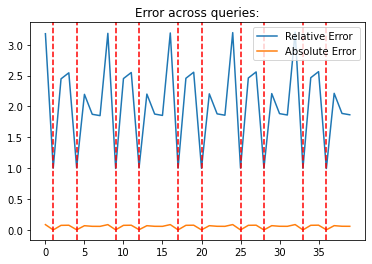

In [5]:
pmw(W_five_identity, x_peaks)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 3200.67325048008
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 771.9106542202019
1 [0. 1. 0. 0. 0. 0. 0. 0.] 1221.1187467037505
2 [0. 0. 1. 0. 0. 0. 0. 0.] 1173.405186368053
3 [0. 0. 0. 1. 0. 0. 0. 0.] 1540.7911173773746
4 [0. 0. 0. 0. 1. 0. 0. 0.] 1802.9820440409262
5 [0. 0. 0. 0. 0. 1. 0. 0.] 1443.174978204114
6 [0. 0. 0. 0. 0. 0. 1. 0.] 1564.8357710559958
7 [0. 0. 0. 0. 0. 0. 0. 1.] 1752.7423078649983
8 [1. 0. 0. 0. 0. 0. 0. 0.] 1024.6759287729974
9 [1. 1. 0. 0. 0. 0. 0. 0.] 2388.788615785285
10 [1. 1. 1. 0. 0. 0. 0. 0.] 3353.7174261371556
11 [1. 1. 1. 1. 0. 0. 0. 0.] 4552.420544426649
12 [1. 1. 1. 1. 1. 0. 0. 0.] 6343.558025284148
13 [1. 1. 1. 1. 1. 1. 0. 0.] 7642.25354041179
14 [1. 1. 1. 1. 1. 1. 1. 0.] 9374.982526465667
15 [1. 1. 1. 1. 1. 1. 1. 1.] 10816.106883262197
16 [0. 1. 0. 0. 0. 0. 0. 0.] 1148.5637197131887
17 [0. 1. 1. 0. 0. 0. 0. 0.] 2386.48719491275
18 [0. 1. 1. 1. 0. 0. 0. 0.] 3753.1

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.25,
 0.30135601313002297,
 0.4090672428801536,
 0.5700071242402527,
 0.6867025394555,
 0.8423948163645033,
 0.9718874108950761,
 0.12233378082243251,
 0.24466756164486503,
 0.33723892747704826,
 0.4629264637073194,
 0.6142552502805736,
 0.750694033233126,
 0.9215754584323378,
 0.1197013639549449,
 0.2407730170851838,
 0.37191560904095816,
 0.4925120769593665,
 0.6773403147017173,
 0.8179759680884343,
 0.11863714756700357,
 0.24000605512415343,
 0.36552855417455526,
 0.5103614602746365,
 0.697478053360245,
 0.11928892225237193,
 0.24272162390075602,
 0.4236293924070271,
 0.5846874299528557,
 0.12186103352396782,
 0.24939866587700177,
 0.42655363420891784,
 0.12664515632254536,
 0.3268471303704145,
 0.13293686641262076]

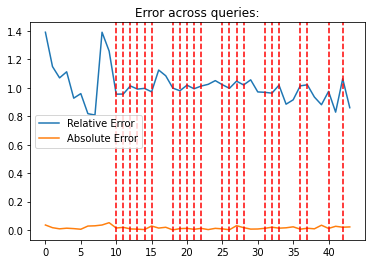

In [6]:
pmw(W_sd, x_flat)

original database: [1000 8000 1300 1250 9000 1450 1700 1720]
T (Threshold) = 2284.9031510428154
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 1147.584982880108
1 [0. 1. 0. 0. 0. 0. 0. 0.] 8182.501575680545
2 [0. 0. 1. 0. 0. 0. 0. 0.] 1446.9993603603255
3 [0. 0. 0. 1. 0. 0. 0. 0.] 1277.0381403080964
4 [0. 0. 0. 0. 1. 0. 0. 0.] 9194.55995989417
5 [0. 0. 0. 0. 0. 1. 0. 0.] 1419.3075445451414
6 [0. 0. 0. 0. 0. 0. 1. 0.] 1656.3358843235267
7 [0. 0. 0. 0. 0. 0. 0. 1.] 1672.4513128537822
8 [1. 0. 0. 0. 0. 0. 0. 0.] 997.4489482324165
9 [1. 1. 0. 0. 0. 0. 0. 0.] 8981.928869725596
10 [1. 1. 1. 0. 0. 0. 0. 0.] 10349.114050094133
11 [1. 1. 1. 1. 0. 0. 0. 0.] 11473.809503905233
12 [1. 1. 1. 1. 1. 0. 0. 0.] 20455.08118232693
13 [1. 1. 1. 1. 1. 1. 0. 0.] 22033.36310966848
14 [1. 1. 1. 1. 1. 1. 1. 0.] 23661.55939006011
15 [1. 1. 1. 1. 1. 1. 1. 1.] 25247.26362037931
16 [0. 1. 0. 0. 0. 0. 0. 0.] 7923.243005260043
17 [0. 1. 1. 0. 0. 0. 0. 0.] 9461.37971486538
18 [0. 1. 1. 1. 0. 0. 0. 0.] 10525.

[0.125,
 0.3218971902313354,
 0.12511735240139552,
 0.12511735240139552,
 0.36171066393574236,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.35335084185188376,
 0.40713956106660315,
 0.4513889519185703,
 0.8047089811108691,
 0.8668020982937573,
 0.9308588430395077,
 0.9932440448614993,
 0.3116980664720251,
 0.3722118238665318,
 0.4140674759798381,
 0.7689660413070446,
 0.8253056867014976,
 0.8911405675345512,
 0.9611024041640286,
 0.1213499967894642,
 0.09663475648522642,
 0.45622881718061636,
 0.5164382331706806,
 0.5665039054230724,
 0.6403571234981528,
 0.12087090541189958,
 0.4051909873847331,
 0.46185160357280525,
 0.5224040365836057,
 0.5936439727308135,
 0.35971657413534713,
 0.4092056171062998,
 0.4780949366528109,
 0.5502302763901747,
 0.12361096377591026,
 0.12530294211755805,
 0.19661049711885473,
 0.12704142211575856,
 0.13369629784092513,
 0.13217472045029702]

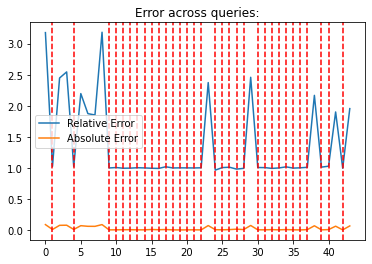

In [7]:
pmw(W_sd, x_peaks)

So far, it is clear that the algorithm updates more when 
- answering dense (all-range) than sparse (identity) workloads,
- flat than uneven dataframes.

The next question we need to think about is what to initialize the threshold and level of laplace noise to add. 

7/16 Questions - what do we initialize laplace_scale and threshold to be? How do I use epsilon and beta for this new instance? Do we want to be changing the d_t_hat threshold or the threshold for the max amount of updates - let's start playing with the query threshold because d_t_hat threshold honestly seems pretty reasonable.

# optimized

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 5000
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 999.8602962448538
1 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.8861886347972
2 [0. 0. 1. 0. 0. 0. 0. 0.] 1299.8802733565778
3 [0. 0. 0. 1. 0. 0. 0. 0.] 1249.8657912307895
4 [0. 0. 0. 0. 1. 0. 0. 0.] 1499.8921020330297
5 [0. 0. 0. 0. 0. 1. 0. 0.] 1449.9262537164004
6 [0. 0. 0. 0. 0. 0. 1. 0.] 1699.876868388778
7 [0. 0. 0. 0. 0. 0. 0. 1.] 1719.8729465331976
8 [1. 0. 0. 0. 0. 0. 0. 0.] 999.8747243085745
9 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.8747838246145
10 [0. 0. 1. 0. 0. 0. 0. 0.] 1299.8754347782321
11 [0. 0. 0. 1. 0. 0. 0. 0.] 1249.8833097546124
12 [0. 0. 0. 0. 1. 0. 0. 0.] 1499.8865292473142
13 [0. 0. 0. 0. 0. 1. 0. 0.] 1449.8650150673484
14 [0. 0. 0. 0. 0. 0. 1. 0.] 1699.8776874010227
15 [0. 0. 0. 0. 0. 0. 0. 1.] 1719.8594407824387
16 [1. 0. 0. 0. 0. 0. 0. 0.] 999.91409270705
17 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.8686538726515
18 [0. 0. 1. 0. 0. 0. 0. 0.] 1299.86897655

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125]

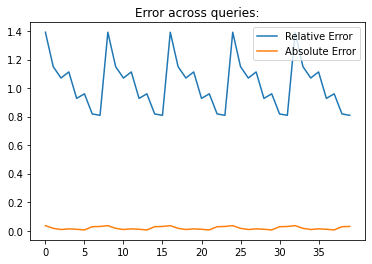

In [8]:
pmw_optimized(W_five_identity, x_flat, laplace_scale=0.01, threshold=5000)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 5000
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 999.8653380846538
1 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.8781436105755
2 [0. 0. 1. 0. 0. 0. 0. 0.] 1299.88294498861
3 [0. 0. 0. 1. 0. 0. 0. 0.] 1249.8691482793513
4 [0. 0. 0. 0. 1. 0. 0. 0.] 1499.873153297395
5 [0. 0. 0. 0. 0. 1. 0. 0.] 1449.8605680201488
6 [0. 0. 0. 0. 0. 0. 1. 0.] 1699.8671000149031
7 [0. 0. 0. 0. 0. 0. 0. 1.] 1719.8682712312539
8 [1. 0. 0. 0. 0. 0. 0. 0.] 999.8902079190398
9 [1. 1. 0. 0. 0. 0. 0. 0.] 2209.752142002767
10 [1. 1. 1. 0. 0. 0. 0. 0.] 3509.623210921415
11 [1. 1. 1. 1. 0. 0. 0. 0.] 4759.492609329167
12 [1. 1. 1. 1. 1. 0. 0. 0.] 6259.398496722275
13 [1. 1. 1. 1. 1. 1. 0. 0.] 7709.260147115741
14 [1. 1. 1. 1. 1. 1. 1. 0.] 9409.120635846459
15 [1. 1. 1. 1. 1. 1. 1. 1.] 11129.000818470864
16 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.8754202855264
17 [0. 1. 1. 0. 0. 0. 0. 0.] 2509.7574631043735
18 [0. 1. 1. 1. 0. 0. 0. 0.] 3759.61753132094
1

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.25,
 0.375,
 0.5,
 0.5624459565788208,
 0.6927231236369603,
 0.8454621446665812,
 1.0000000735373642,
 0.12392785245611689,
 0.24785570491223377,
 0.37178355736835067,
 0.47259615634462104,
 0.6028746594154898,
 0.7556156704120827,
 0.9101524476569149,
 0.12214676380591444,
 0.24429352761182888,
 0.3664402914177433,
 0.4941626433000202,
 0.6468999944221999,
 0.8014390485788794,
 0.12056036460164193,
 0.24112072920328387,
 0.36445713813143166,
 0.5301007508571147,
 0.6846357203309842,
 0.11934702288181961,
 0.24144215146862086,
 0.36777853958429163,
 0.5723266058442746,
 0.12140025988812382,
 0.2470176414175233,
 0.37848660207996776,
 0.1256173815293995,
 0.2570863421918439,
 0.13146896066244443]

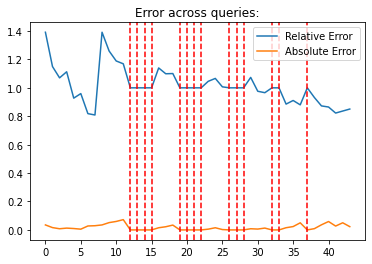

In [9]:
pmw_optimized(W_sd, x_flat, laplace_scale=0.01, threshold=5000)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 5000
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 999.8671510871924
1 [1. 1. 0. 0. 0. 0. 0. 0.] 2209.7200502821956
2 [1. 1. 1. 0. 0. 0. 0. 0.] 3509.6279542292104
3 [1. 1. 1. 1. 0. 0. 0. 0.] 4759.490660567639
4 [1. 1. 1. 1. 1. 0. 0. 0.] 6259.373630395642
5 [1. 1. 1. 1. 1. 1. 0. 0.] 7709.242283284084
6 [1. 1. 1. 1. 1. 1. 1. 0.] 9409.139670287042
7 [1. 1. 1. 1. 1. 1. 1. 1.] 11129.004555010999
8 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.8741275554598
9 [0. 1. 1. 0. 0. 0. 0. 0.] 2509.746825678422
10 [0. 1. 1. 1. 0. 0. 0. 0.] 3759.636906204197
11 [0. 1. 1. 1. 1. 0. 0. 0.] 5259.476824179354
12 [0. 1. 1. 1. 1. 1. 0. 0.] 6709.387667105023
13 [0. 1. 1. 1. 1. 1. 1. 0.] 8409.250964134439
14 [0. 1. 1. 1. 1. 1. 1. 1.] 10129.127466804226
15 [0. 0. 1. 0. 0. 0. 0. 0.] 1299.857234944715
16 [0. 0. 1. 1. 0. 0. 0. 0.] 2549.7555162292833
17 [0. 0. 1. 1. 1. 0. 0. 0.] 4049.644460963689
18 [0. 0. 1. 1. 1. 1. 0. 0.] 5499.500280232799
1

[0.125,
 0.25,
 0.375,
 0.5,
 0.5624437224075151,
 0.6927215186206389,
 0.8454638548589067,
 1.000000409255256,
 0.12392785245611689,
 0.24785570491223377,
 0.37178355736835067,
 0.47259411820208247,
 0.6028757041333185,
 0.7556150576747557,
 0.9101528206517907,
 0.12214676380591444,
 0.24429352761182888,
 0.3664402914177433,
 0.4941591805805084,
 0.6468986101688412,
 0.8014385908678363,
 0.12056036460164193,
 0.24112072920328387,
 0.36445713813143166,
 0.530099763666449,
 0.6846368752829327,
 0.11934702288181961,
 0.24144215146862086,
 0.36777853958429163,
 0.5723261691750504,
 0.12140025988812382,
 0.2470176414175233,
 0.37848660207996776,
 0.1256173815293995,
 0.2570863421918439,
 0.13146896066244443,
 0.13297396016897228,
 0.127055394701942,
 0.12278999728547871,
 0.12002625154098727,
 0.11866779422265196,
 0.12140025988812382,
 0.1256173815293995,
 0.13146896066244443]

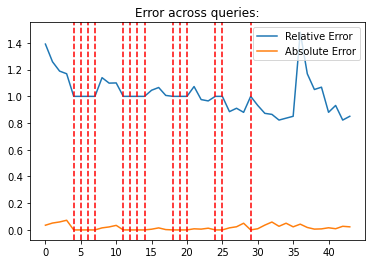

In [10]:
pmw_optimized(W_ds, x_flat, laplace_scale=0.01, threshold=5000)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 5000
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 999.8776928871769
1 [1. 1. 0. 0. 0. 0. 0. 0.] 2209.761074203188
2 [1. 1. 1. 0. 0. 0. 0. 0.] 3509.6033636244533
3 [1. 1. 1. 1. 0. 0. 0. 0.] 4759.502632030651
4 [1. 1. 1. 1. 1. 0. 0. 0.] 6259.389087680697
5 [1. 1. 1. 1. 1. 1. 0. 0.] 7709.256311152332
6 [1. 1. 1. 1. 1. 1. 1. 0.] 9409.120124227788
7 [1. 1. 1. 1. 1. 1. 1. 1.] 11129.003326591033
8 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.866768339019
9 [0. 1. 1. 0. 0. 0. 0. 0.] 2509.7596712272084
10 [0. 1. 1. 1. 0. 0. 0. 0.] 3759.651116937514
11 [0. 1. 1. 1. 1. 0. 0. 0.] 5259.501392349616
12 [0. 1. 1. 1. 1. 1. 0. 0.] 6709.38063449196
13 [0. 1. 1. 1. 1. 1. 1. 0.] 8409.249775149425
14 [0. 1. 1. 1. 1. 1. 1. 1.] 10129.160123616388
15 [0. 0. 1. 0. 0. 0. 0. 0.] 1299.8523662854445
16 [0. 0. 1. 1. 0. 0. 0. 0.] 2549.754992570519
17 [0. 0. 1. 1. 1. 0. 0. 0.] 4049.650213258356
18 [0. 0. 1. 1. 1. 1. 0. 0.] 5499.496207847759
19 

[0.125,
 0.25,
 0.375,
 0.5,
 0.562445111202219,
 0.6927227789861599,
 0.8454620986990456,
 1.0000002988850885,
 0.12392785245611689,
 0.24785570491223377,
 0.37178355736835067,
 0.47259632558485537,
 0.6028750722723066,
 0.7556149508477105,
 0.9101557547768726,
 0.12214676380591444,
 0.24429352761182888,
 0.3664402914177433,
 0.4941588146878723,
 0.6469001325726517,
 0.8014373485828662,
 0.12056036460164193,
 0.24112072920328387,
 0.36445713813143166,
 0.5300991353539692,
 0.6846351152480318,
 0.11934702288181961,
 0.24144215146862086,
 0.36777853958429163,
 0.572327801369022,
 0.12140025988812382,
 0.2470176414175233,
 0.37848660207996776,
 0.1256173815293995,
 0.2570863421918439,
 0.13146896066244443,
 0.13297396016897228,
 0.127055394701942,
 0.12278999728547871,
 0.12002625154098727,
 0.11866779422265196,
 0.12140025988812382,
 0.1256173815293995,
 0.13146896066244443,
 0.13297396016897228,
 0.2600293548709143,
 0.382819352156393,
 0.5028456036973803,
 0.5624429509281484,
 0.69272

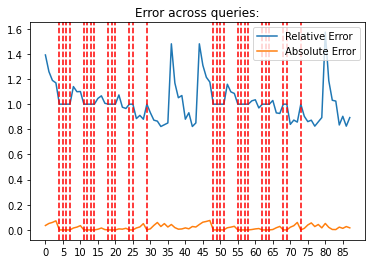

In [11]:
pmw_optimized(np.vstack((W_ds, W_ds)), x_flat, laplace_scale=0.01, threshold=5000)